# 캘리포니아 집값 예측하기

- 캘리포니아 집값 8개의 특성(피처)을 사용하여 집값을 예측하는 문제입니다. <br> 이전과 달리 "분류"가 아닌 "회귀"방식을 통해 문제를 해결한다는 차이점이 있습니다.

```
실습목표
1. 데이터셋을 불러와서 모델에 입력가능하도록 변경합니다.
2. W&B 를 통해서 성능을 기록합니다.
3. 모델을 훈련시키고 평가합니다.
```

```
실습단계
1. 라이브러리 임포트
2. 데이터셋 로드 및 전처리
3. W&B 설정
4. 모델 로드 및 학습
5. 모델 평가 및 예측
6. 결과 시각화

```


## Mission : WandB에 아래와 같이, n_estimator 를 50씩 증가시켜가며 학습 결과를 기록하도록 코드를 작성하시오. 이떄 log는 train/test 각각의 mse 와 r2 를 기록한다.

- (선택) 앞선 미션을 완수하신 분들께서는 타이타닉 생존자 예측때 활용한 pipeline 을 활용하여 모델에 대해서도 WandB에 모델들의 결과를 비교 기록하시오.

### 1.라이브러리 임포트



In [ ]:
!pip -q install wandb

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.7/6.7 MB 19.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.3/207.3 kB 12.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 289.0/289.0 kB 7.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.7/62.7 kB 3.5 MB/s eta 0:00:00


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor

from sklearn.metrics import mean_squared_error, r2_score
from sklearn.datasets import fetch_california_housing
import wandb

### 2.W&B 설정

In [ ]:
!wandb login

wandb: Currently logged in as: jonhyuk0922. Use `wandb login --relogin` to force relogin


In [ ]:
wandb.init(
    project = "regression",
    name = "california_3"
)

<IPython.core.display.Javascript object>

wandb: Logging into wandb.ai. (Learn how to deploy a W&B server locally: https://wandb.me/wandb-server)
wandb: You can find your API key in your browser here: https://wandb.ai/authorize
wandb: Paste an API key from your profile and hit enter, or press ctrl+c to quit:

 ··········


wandb: Appending key for api.wandb.ai to your netrc file: /root/.netrc


In [ ]:
config = wandb.config
config.test_size = 0.2
config.random_state = 42
config.model_name = "RandomForest"
config.n_estimators_list = [50*i for i in range(1,11)] # 점점 증가해가도록 리스트 생성

In [ ]:
config.n_estimators_list

[50, 100, 150, 200, 250, 300, 350, 400, 450, 500]

###3.데이터셋 로드 및 전처리


In [ ]:
# 데이터 로드
# california = fetch_california_housing()
X = pd.read_csv("./california.csv",index_col=0)
y = pd.read_csv("/content/drive/MyDrive/교육자 조녁/패캠 ML 강의/실습자료/실습데이터/california_target.csv",index_col=0)

In [ ]:
# y = pd.DataFrame(data=california.target ,columns=california.target_names)
# y.to_csv('./california_target.csv')

In [ ]:
# df = pd.DataFrame(data=california.data ,columns=california.feature_names)
# df.to_csv('./california.csv')

In [ ]:
y

,MedHouseVal
0,4.526
1,3.585
2,3.521
3,3.413
4,3.422
...,...
20635,0.781
20636,0.771
20637,0.923
20638,0.847


- `fetch_california_housing()`을 사용하여 캘리포니아 주택 가격 데이터를 로드합니다. 데이터는 X(입력 특성)와 y(주택 가격 목표값)로 나뉩니다.

[8가지 특징 설명]
- MedInc: 해당 지역 가구의 중간 소득.
- HouseAge: 해당 지역의 평균 주택 연령입니다.
- AveRooms: 해당 지역 주택의 평균 방 수입니다.
- AveBedrms: 해당 지역 주택의 평균 침실 수입니다.
- 인구: 해당 구역의 전체 인구입니다.
- AveOccup: 해당 구역의 평균 가구 점유율입니다.
- 위도: 구역의 위도 좌표입니다.
- 경도: 구역의 경도 좌표입니다.

[라벨 설명]
- MedHouseVal: 구역 내 가구의 중간 주택 가치입니다.
- 단위는 달러이며 10만 달러를 기준으로 하고 있습니다.

In [ ]:
X.values.shape

(20640, 8)

In [ ]:
# 데이터 정규화
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X.values)

# 학습 데이터와 테스트 데이터 분리
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y.values, test_size=config.test_size, random_state=config.random_state)

In [ ]:
X_train.shape

(16512, 8)

In [ ]:
y_train.shape

(16512, 1)

### 4.모델 로드 및 학습

In [ ]:
# 모델을 훈련 데이터에 적합시킵니다.
for n_estimators in config.n_estimators_list:
    # 랜덤 포레스트 회귀 모델을 생성합니다.
    model = RandomForestRegressor(
        n_estimators= n_estimators, # n_estimators는 결정 트리의 수를 의미합니다. 숫자가 커지면 오래 걸릴 수 있음
        random_state=config.random_state)
    # 모델을 학습시킵니다.
    model.fit(X_train, y_train)

    # 예측
    y_pred_train = model.predict(X_train)
    y_pred_test = model.predict(X_test)

    # 성능 평가
    train_mse = mean_squared_error(y_train, y_pred_train)
    test_mse = mean_squared_error(y_test, y_pred_test)
    train_r2 = r2_score(y_train, y_pred_train)
    test_r2 = r2_score(y_test, y_pred_test)

    print(f'n_estimators: {n_estimators}')
    print("-"*100)
    print(f'Train MSE: {train_mse}, Train R^2: {train_r2}')
    print(f'Test MSE: {test_mse}, Test R^2: {test_r2}')

    # W&B 로그
    wandb.log({
        'train_mse' : train_mse,
        'test_mse' : test_mse,
        'train_r2' : train_r2,
        'test_r2' : test_r2,
        'n_estimators' : n_estimators
    })


<ipython-input-53-32daae90d6db>:8: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  model.fit(X_train, y_train)


n_estimators: 50
----------------------------------------------------------------------------------------------------
Train MSE: 0.0370840439666257, Train R^2: 0.972258641231903
Test MSE: 0.2574534902888876, Test R^2: 0.8035319548600052


<ipython-input-53-32daae90d6db>:8: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  model.fit(X_train, y_train)


n_estimators: 100
----------------------------------------------------------------------------------------------------
Train MSE: 0.035332010532530315, Train R^2: 0.9735692800638676
Test MSE: 0.25549776668540763, Test R^2: 0.805024407701793


<ipython-input-53-32daae90d6db>:8: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  model.fit(X_train, y_train)


n_estimators: 150
----------------------------------------------------------------------------------------------------
Train MSE: 0.034813216144468744, Train R^2: 0.9739573731547678
Test MSE: 0.2547175404956103, Test R^2: 0.8056198143288482


<ipython-input-53-32daae90d6db>:8: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  model.fit(X_train, y_train)


n_estimators: 200
----------------------------------------------------------------------------------------------------
Train MSE: 0.03447518004770721, Train R^2: 0.9742102468878825
Test MSE: 0.25401057726311893, Test R^2: 0.8061593124887589


<ipython-input-53-32daae90d6db>:8: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  model.fit(X_train, y_train)


n_estimators: 250
----------------------------------------------------------------------------------------------------
Train MSE: 0.03426236194320883, Train R^2: 0.9743694491419449
Test MSE: 0.2531761337885652, Test R^2: 0.8067960934391413


<ipython-input-53-32daae90d6db>:8: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  model.fit(X_train, y_train)


### 5.모델 추론/평가하기

### 6.결과 시각화

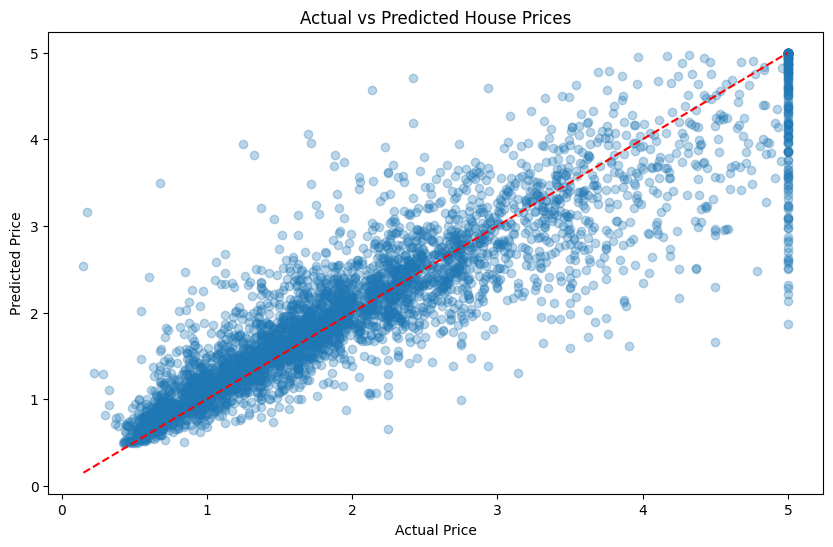

In [ ]:
# 결과 시각화
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred_test, alpha=0.3)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')
plt.xlabel('Actual Price')
plt.ylabel('Predicted Price')
plt.title('Actual vs Predicted House Prices')
plt.show()


In [ ]:
wandb.sklearn.plot_regressor(model,
                             X_train,
                             X_test,
                             y_train,
                             y_test,
                             model_name = config.model_name)

wandb: 
wandb: Plotting RandomForest.
wandb: Logged summary metrics.
wandb: Logged learning curve.
wandb: WARNING using only the first 1000 datapoints to create chart outlier_candidates
wandb: Logged outlier candidates.
wandb: WARNING using only the first 100 datapoints to create chart residuals
wandb: WARNING using only the first 100 datapoints to create chart residuals
wandb: Logged residuals.
